In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Q1

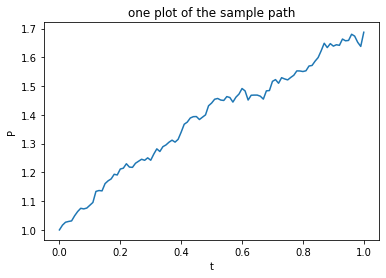

In [ ]:
mu, theta, sigma, n = 1, 1, 0.1, 100000
X0 = 0
T = 1
N = 100
dt = T/N
P1 = []
X = np.zeros(N+1)

for i in range(n):
  X[0] = X0
  for j in range(N):
    X[j+1] = X[j] + theta*(mu - X[j])*dt + sigma*np.sqrt(dt)*np.random.randn()
  P1.append(np.exp(X[-1]))

P = np.exp(X)

plt.plot(np.linspace(0, T, N+1), P)
plt.title('one plot of the sample path')
plt.xlabel('t')
plt.ylabel('P')
plt.show()

E[P1] = 1.8888793465455178
Var(P1) = 0.01545660755335588


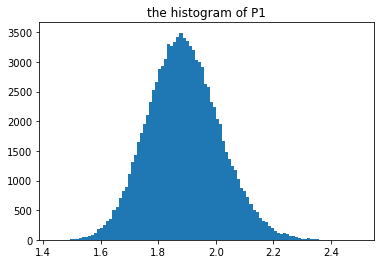

In [ ]:
print('E[P1] =', np.mean(P1))
print('Var(P1) =', np.var(P1))

plt.hist(P1, bins=100)
plt.title('the histogram of P1')
plt.show()

# Q2

## (a)

In [ ]:
T = 10
n = 10000
lbd = (2+T+T**2)/100 # >= lbd(t) for all t in [0,10]
total_money = []
total_arrivals = []

for i in range(n):
  money = 0
  arrival = 0
  t = 0
  t = t - np.log(np.random.rand())/lbd
  while t < T:
    if np.random.rand() <= ((2+t+t**2)/100)/lbd:
      arrival += 1
      U3 = np.random.rand()
      if U3 <= 1/3:
        money += 100
      elif U3 <= 2/3:
        money += 400
      else:
        money += 900
    t = t - np.log(np.random.rand())/lbd
  total_money.append(money)
  total_arrivals.append(arrival)

print('average arrivals ', np.mean(total_arrivals))
print('the average amount of money:', np.mean(total_money))

average arrivals  4.0294
the average amount of money: 1874.99


## (b)

In [ ]:
print('the variance of the amount of money', np.var(total_money))

the variance of the amount of money 1351568.9599000004


# Q3

## (a)

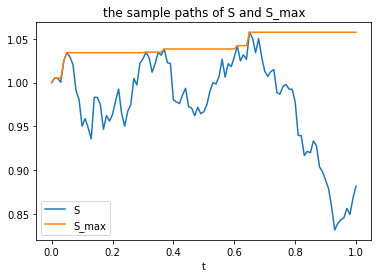

In [ ]:
mu, sigma, S0, T, N = 0.05, 0.15, 1, 1, 100
dt = T/N
S = np.zeros(N+1)
S_max = np.zeros(N+1)
S[0] = S0
S_max[0] = S0
t = np.linspace(0, T, N+1)

for i in range(N):
  Zi = (mu - 0.5*sigma**2)*dt + sigma*np.sqrt(dt)*np.random.randn()
  S[i+1] = S[i] * np.exp(Zi)
  S_max[i+1] = np.max(S)
 
t = np.linspace(0, T, N+1)
plt.plot(t, S, label = 'S')
plt.plot(t, S_max, label = 'S_max')
plt.xlabel('t')
plt.title('the sample paths of S and S_max')
plt.legend()
plt.show()

## (b)

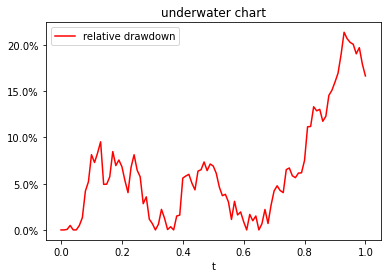

In [ ]:
import matplotlib.ticker as mtick

D = 1 - S/S_max

fig, ax = plt.subplots()

ax.plot(t, D, color = 'red', label = 'relative drawdown')
ax.set_xlabel('t')
ax.set_title('underwater chart')
ax.legend()
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax = 1))
plt.show()

## (c)

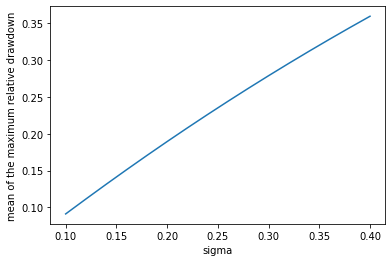

In [ ]:
sigma_space = np.linspace(0.1, 0.4, 16)
total_D_star = []

for i in range(10000):
  S = np.zeros((16, N+1))
  S_max = np.zeros((16, N+1))
  S[:, 0] = S0
  S_max[:, 0] = S0
  for j in range(N):
    Zi = (mu - 0.5*sigma_space**2)*dt + sigma_space*np.sqrt(dt)*np.random.randn()
    S[:, j+1] = S[:, j] * np.exp(Zi)
    S_max[:, j+1] = np.max(S, axis=1)
  D = 1 - S/S_max
  D_star = np.max(D, axis=1)
  total_D_star.append(D_star)

D_star_mean = np.mean(total_D_star, axis = 0)

fig, ax = plt.subplots()

ax.plot(sigma_space, D_star_mean)
ax.set_xlabel('sigma')
ax.set_ylabel('mean of the maximum relative drawdown')

plt.show()

The expected value of D∗ increases as σ increases, which implies they have some kind of linear relationship.